In [365]:
#importing important libraries
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [366]:
N = 200
code = 'GOOG'

In [367]:
data = pd.read_csv(code+'.csv')
data = data[:-N]
data.head()
data.shape

(1059, 7)

In [368]:
training_set = data.iloc[:,4:5].values
#training_set
training_set.shape

(1059, 1)

In [369]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #scaling features between 0 and 1
scaled_training_set = scaler.fit_transform(training_set) # it will start learning algo and then provide scaled and dimension reduced output
scaled_training_set

array([[0.09238648],
       [0.07946672],
       [0.08502128],
       ...,
       [0.60780878],
       [0.59375065],
       [0.6168472 ]])

In [370]:
X_train = []
y_train = []
for i in range(60,len(data)-N):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train.shape, y_train.shape

((799, 60), (799,))

In [371]:
from keras.models import Sequential
from keras.layers import Dense ,  Dropout , LSTM

In [372]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1) ))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True ))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True ))
model.add(Dropout(0.2))

model.add(LSTM(units=50 ))
model.add(Dropout(0.2))

model.add(Dense(10))

In [373]:
from keras.optimizers import Adam , SGD , RMSprop
# selecting the loss measurement metrics and optimizer for our model , to find out mean square error
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [374]:
#model.compile(optimizer ='SGD', loss= 'mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 11s 111ms/step - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 2/10
25/25 [==============================] - 3s 118ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 3/10
25/25 [==============================] - 3s 121ms/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 4/10
25/25 [==============================] - 3s 127ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 5/10
25/25 [==============================] - 3s 111ms/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 6/10
25/25 [==============================] - 3s 119ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 7/10
25/25 [==============================] - 3s 131ms/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 8/10
25/25 [==============================] - 4s 159ms/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 9/10
25/25 [==============================] - 3s 117ms/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 10/

In [375]:
test_data = pd.read_csv(code+'.csv')
testing_set = test_data.iloc[-N:,4:5].values
testing_set.shape

(200, 1)

In [376]:
dataset_total = pd.concat((data['Close'],test_data['Close']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(test_data)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test =np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [377]:
predicted =model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
#predicted[:10]
#reshaping test data in 1D array form
predicted = predicted.reshape(-1 , 1)


1/1 [==============================] - 2s 2s/step


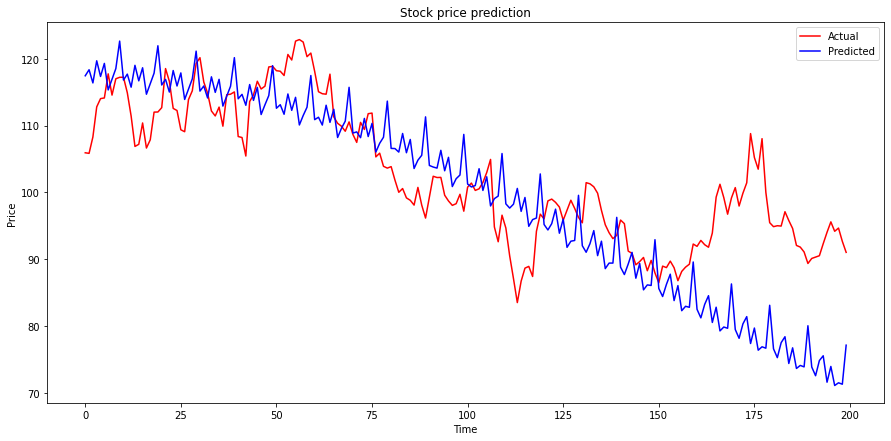

In [378]:
plt.plot(testing_set, color ='red', label ='Actual')
plt.plot(predicted, color ='blue', label ='Predicted')
plt.title('Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

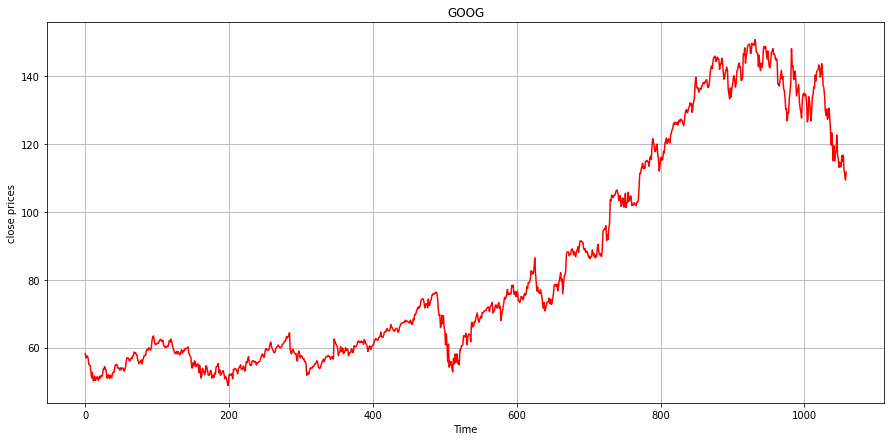

In [379]:

close = data.Close.values.astype('float32')


plt.xlabel('Time') 
plt.ylabel("close prices")
plt.title(code) 
plt.grid(True)
plt.plot(close , 'r')
plt.show()